# Playing multi-armed bandits

We're going to setup different multi-armed bandits and evaluate different strategies.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pelper.pelper import pipe

from pandits import strategies
from pandits.evaluation import (
    run_experiments,
    collect_statistics,
    plot_statistics,
)

%matplotlib inline

# Intro and quick demo
This is how you setup your own experiments.
Specify the experiment with the config and you're done

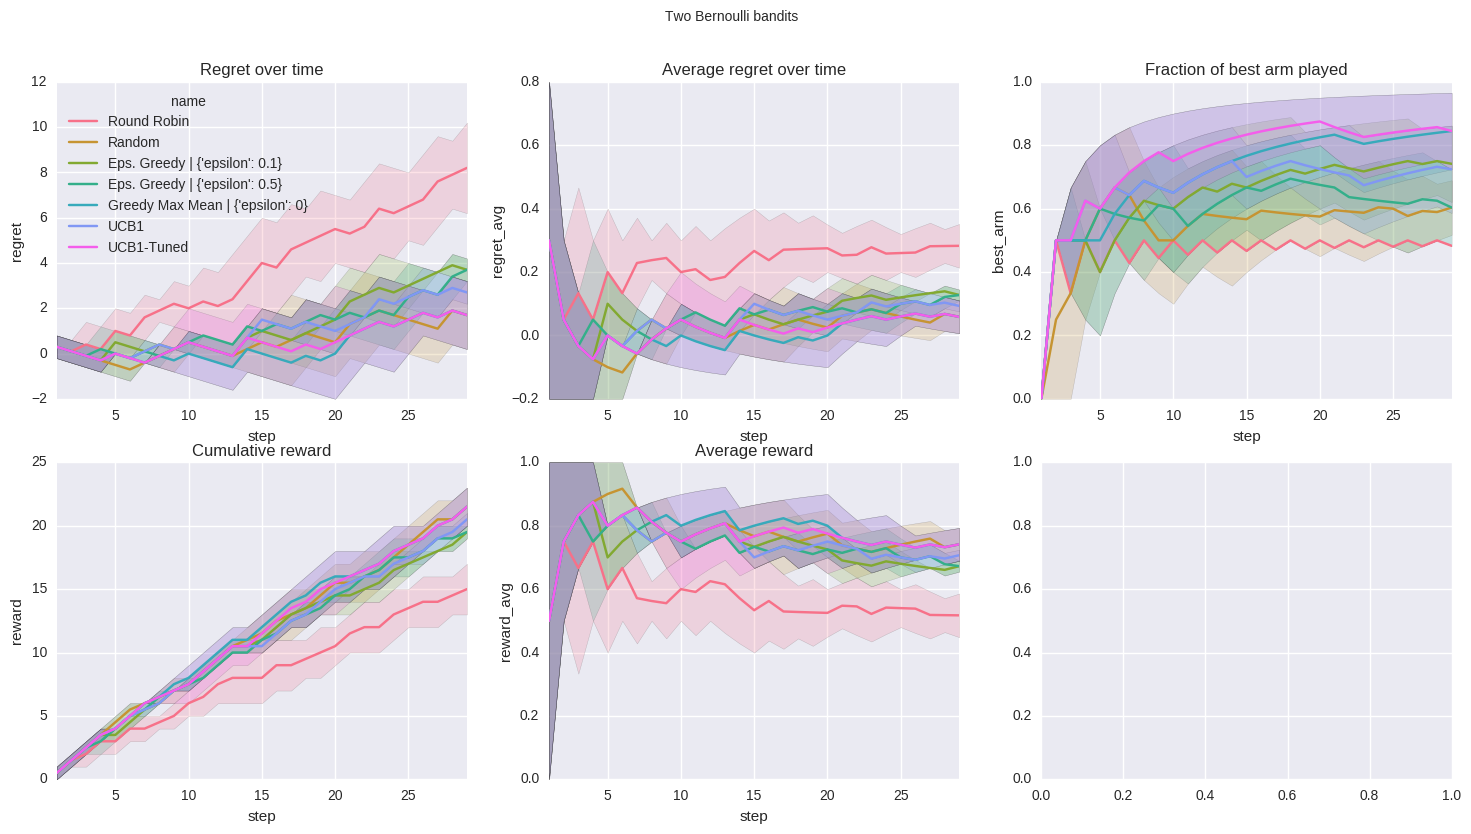

In [2]:
title = "Two Bernoulli bandits"  # title used for plotting
config = {
    "arms": [  # any scipy.stats distributions work
        stats.bernoulli(.5),
        stats.bernoulli(.8),
    ],
    "strategies": [
        # Format: (StrategyClass, ParameterDict),
        (strategies.RoundRobin, None),
        (strategies.Random, None),
        (strategies.EpsilonGreedy, {"epsilon": .1}),
        (strategies.EpsilonGreedy, {"epsilon": .5}),
        (strategies.MaxMean, None),
        (strategies.UCB1, None),
        (strategies.UCB1Tuned, None),
    ],
    "n_plays": 30,  # how many arms to play
    "n_repeats": 2,  # how often to repeat an experiment for a given strategy
}

(fig, ax), data = pipe(
    run_experiments(**config),
    collect_statistics,
    (plot_statistics, {"title": title, "store": True}),
);

## Bernoulli arms
Playing with Bernoulli arms

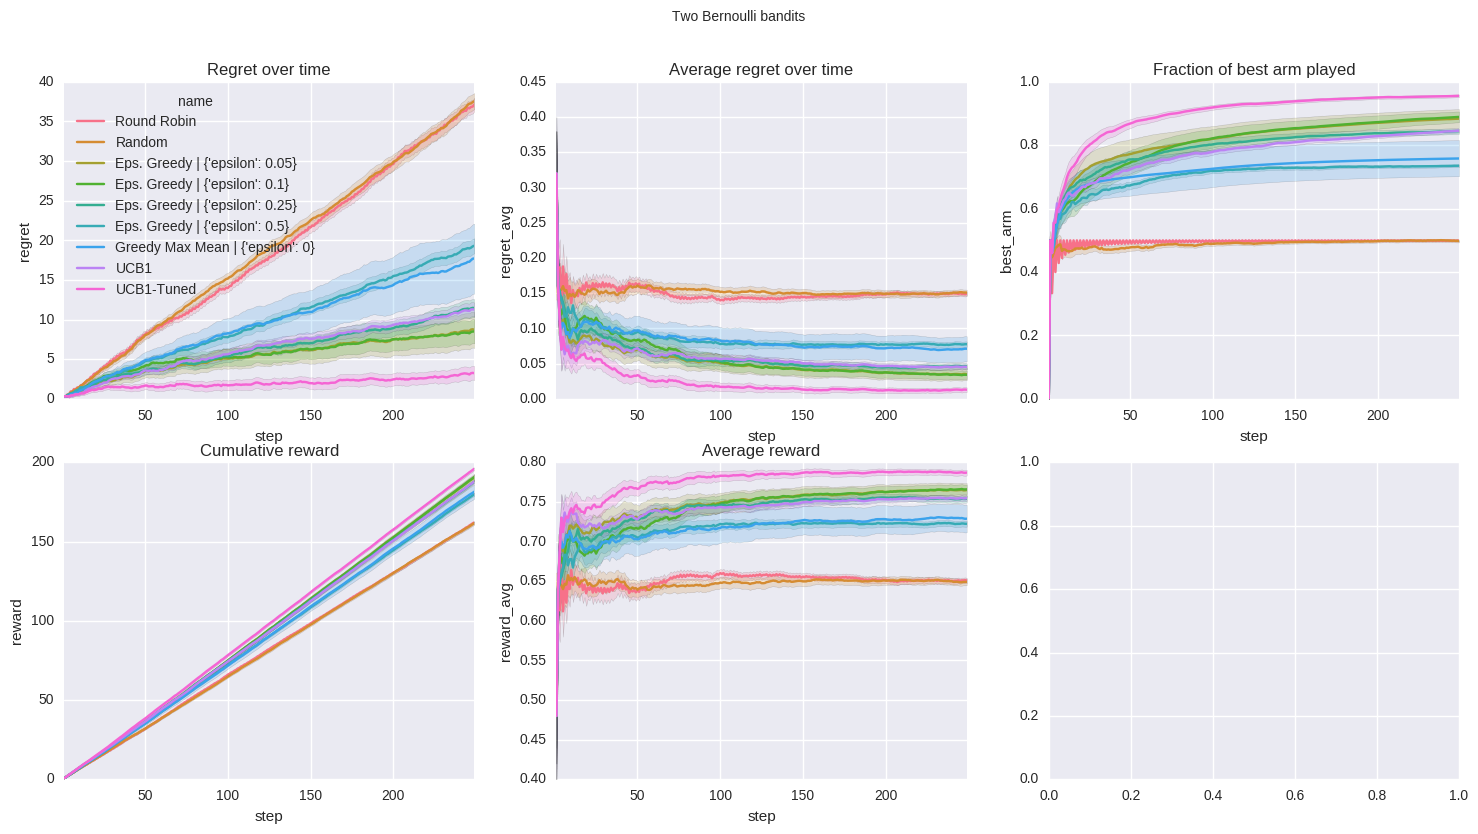

In [3]:
title = "Two Bernoulli bandits"
config = {
    "arms": [
        stats.bernoulli(.5),
        stats.bernoulli(.8),
    ],
    "strategies": [
        (strategies.RoundRobin, None),
        (strategies.Random, None),
        (strategies.EpsilonGreedy, {"epsilon": .05}),
        (strategies.EpsilonGreedy, {"epsilon": .1}),
        (strategies.EpsilonGreedy, {"epsilon": .25}),
        (strategies.EpsilonGreedy, {"epsilon": .5}),
        (strategies.MaxMean, None),
        (strategies.UCB1, None),
        (strategies.UCB1Tuned, None),
    ],
    "n_plays": 250,
    "n_repeats": 50,
}


(fix, ax), plot = pipe(
    run_experiments(**config),
    collect_statistics,
    (plot_statistics, {"title": title, "store": True}),
);

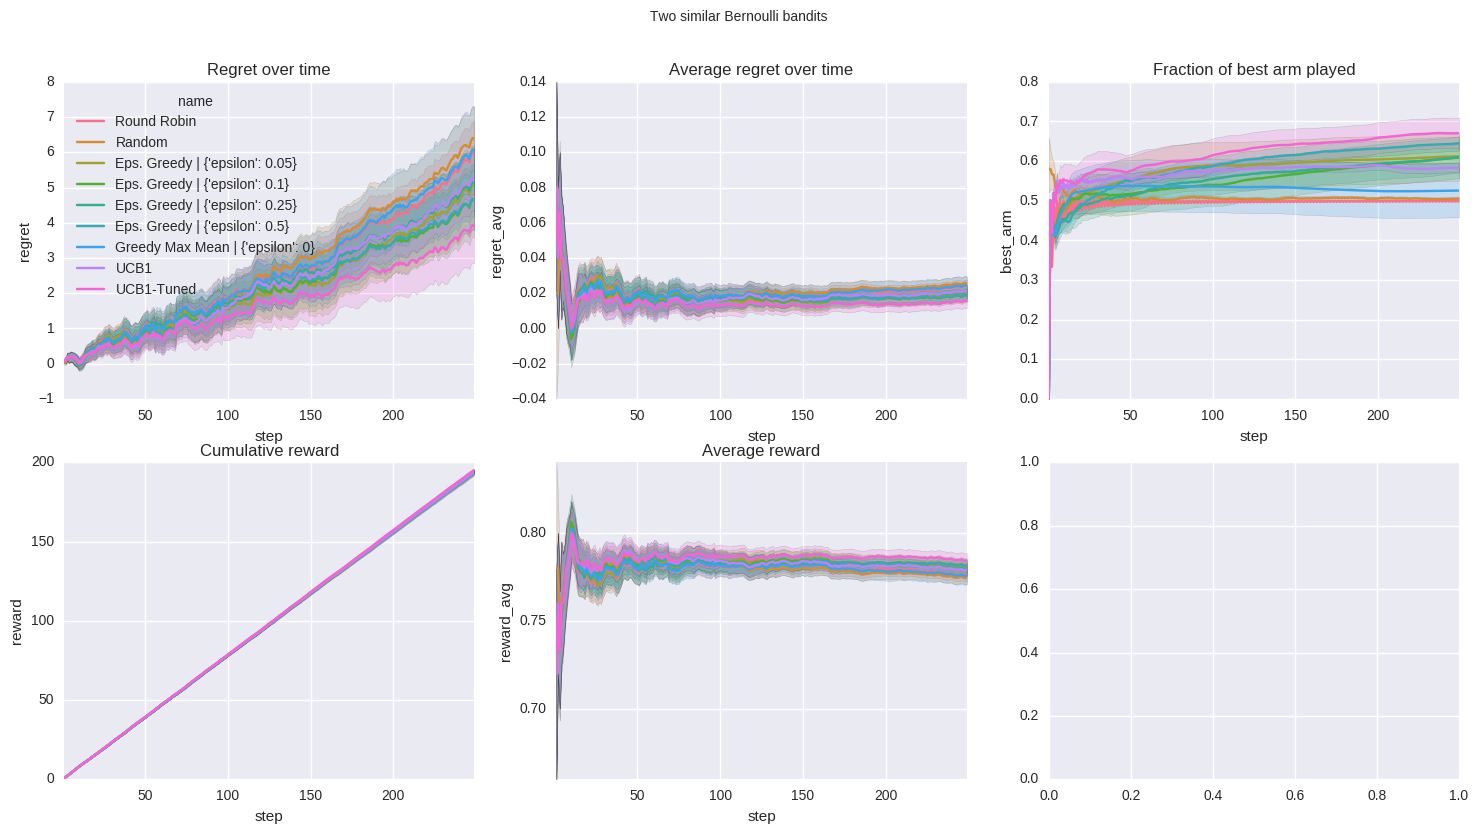

In [4]:
title = "Two similar Bernoulli bandits"
config["arms"] = [
    stats.bernoulli(.75),
    stats.bernoulli(.8)
]

(fix, ax), plot = pipe(
    run_experiments(**config),
    collect_statistics,
    (plot_statistics, {"title": title, "store": True}),
);

P of the Bernoulli arms[ 0.58019343  0.64952487  0.19302412  0.81567747  0.09546292  0.81353053
  0.14138928  0.93405759  0.26955524  0.66781756]


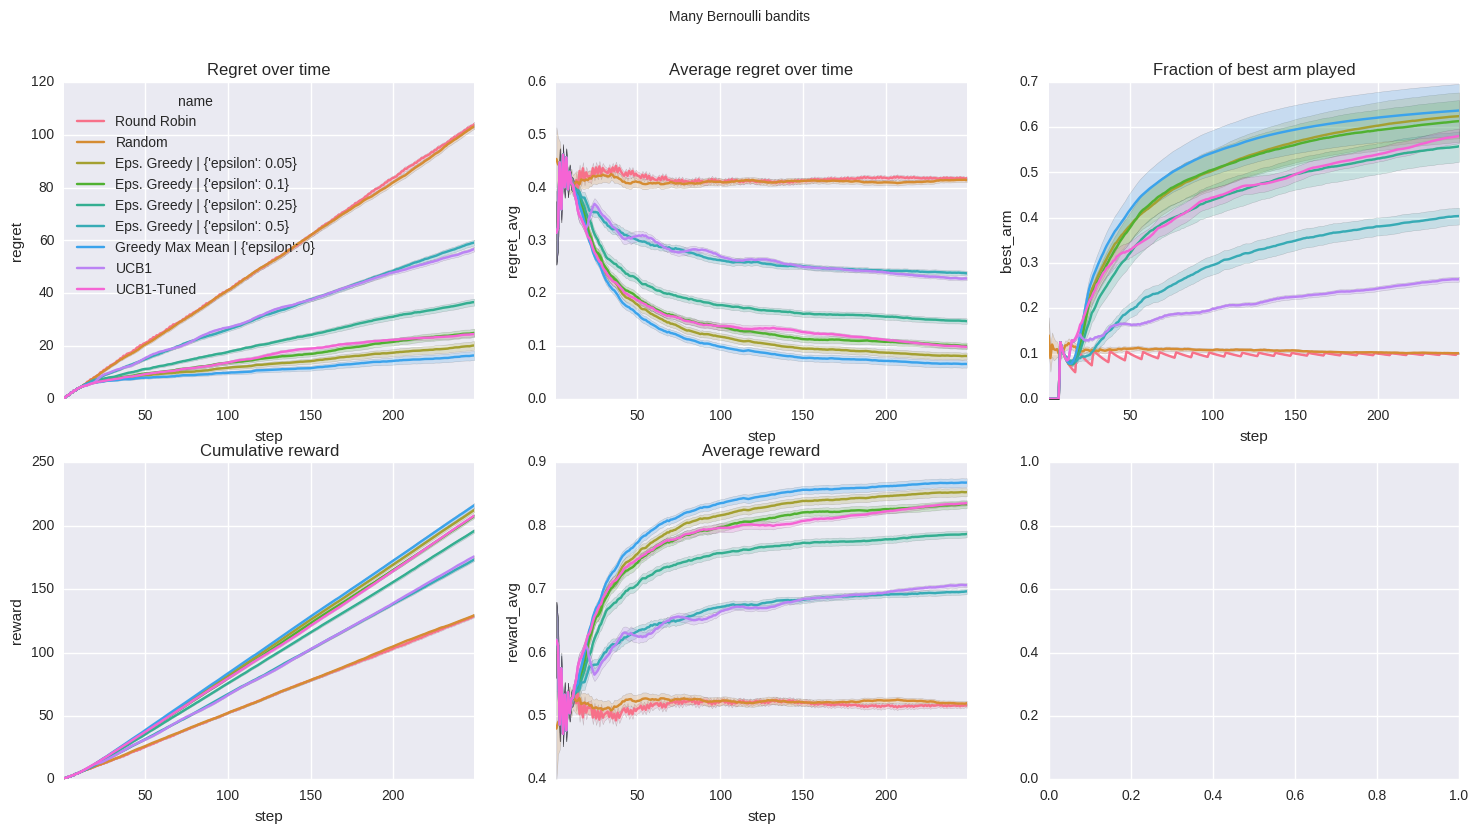

In [5]:
title = "Many Bernoulli bandits"
random_ps = np.random.rand(10)
print("P of the Bernoulli arms{}".format(random_ps))

config["arms"] = [stats.bernoulli(p) for p in random_ps]

(fix, ax), plot = pipe(
    run_experiments(**config),
    collect_statistics,
    (plot_statistics, {"title": title, "store": True}),
);

## Gaussian Arms

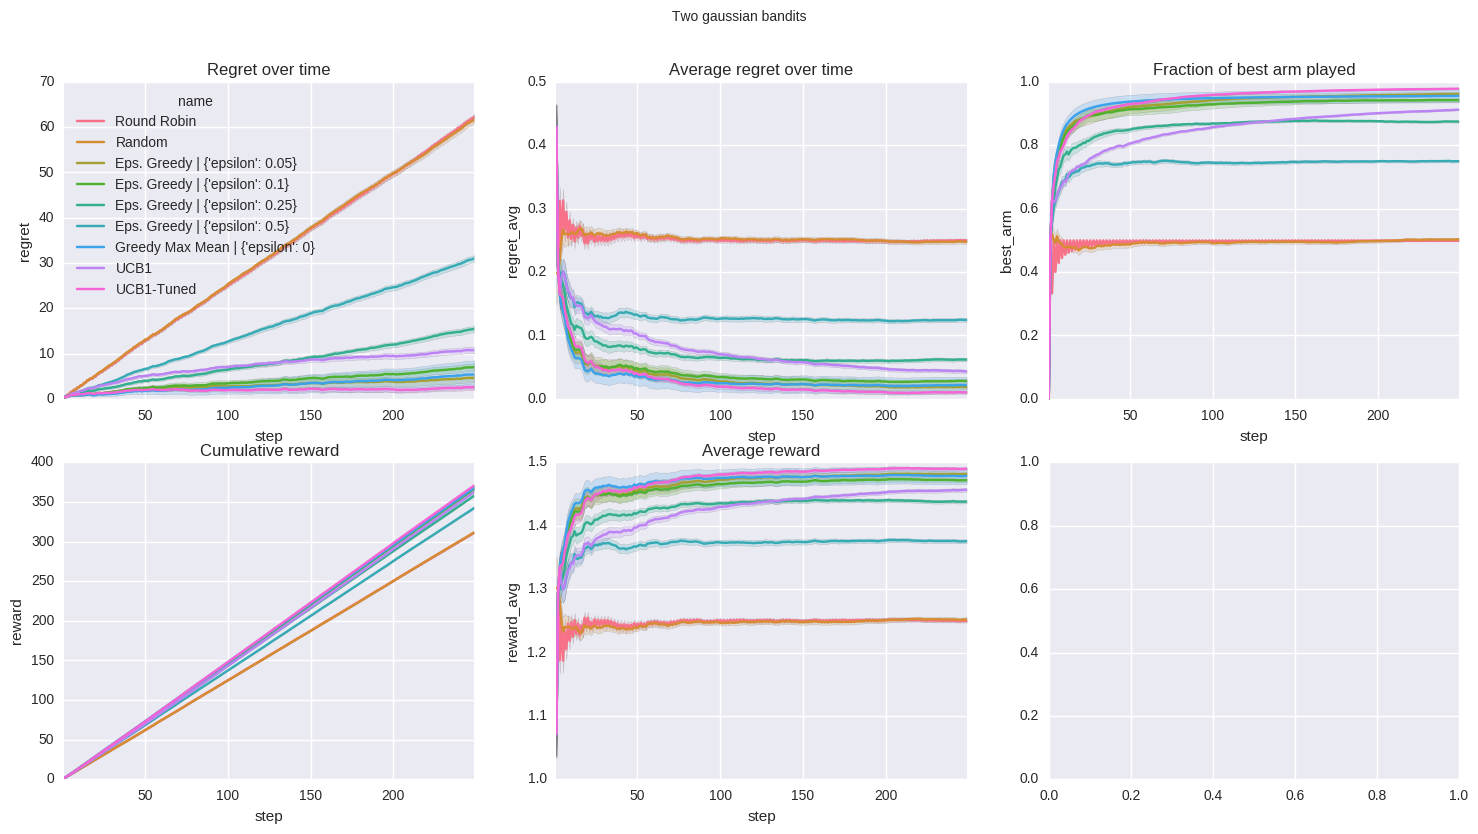

In [6]:
title = "Two gaussian bandits"
config = {
    "arms": [stats.norm(1, .3), stats.norm(1.5, .3)],
    "strategies": [
        (strategies.RoundRobin, None),
        (strategies.Random, None),
        (strategies.EpsilonGreedy, {"epsilon": .05}),
        (strategies.EpsilonGreedy, {"epsilon": .1}),
        (strategies.EpsilonGreedy, {"epsilon": .25}),
        (strategies.EpsilonGreedy, {"epsilon": .5}),
        (strategies.MaxMean, None),
        (strategies.UCB1, None),
        (strategies.UCB1Tuned, None),
    ],
    "n_plays": 250,
    "n_repeats": 50,
}

(fig, ax), plot = pipe(
    run_experiments(**config),
    collect_statistics,
    (plot_statistics, {"title": title, "store": True}),
);

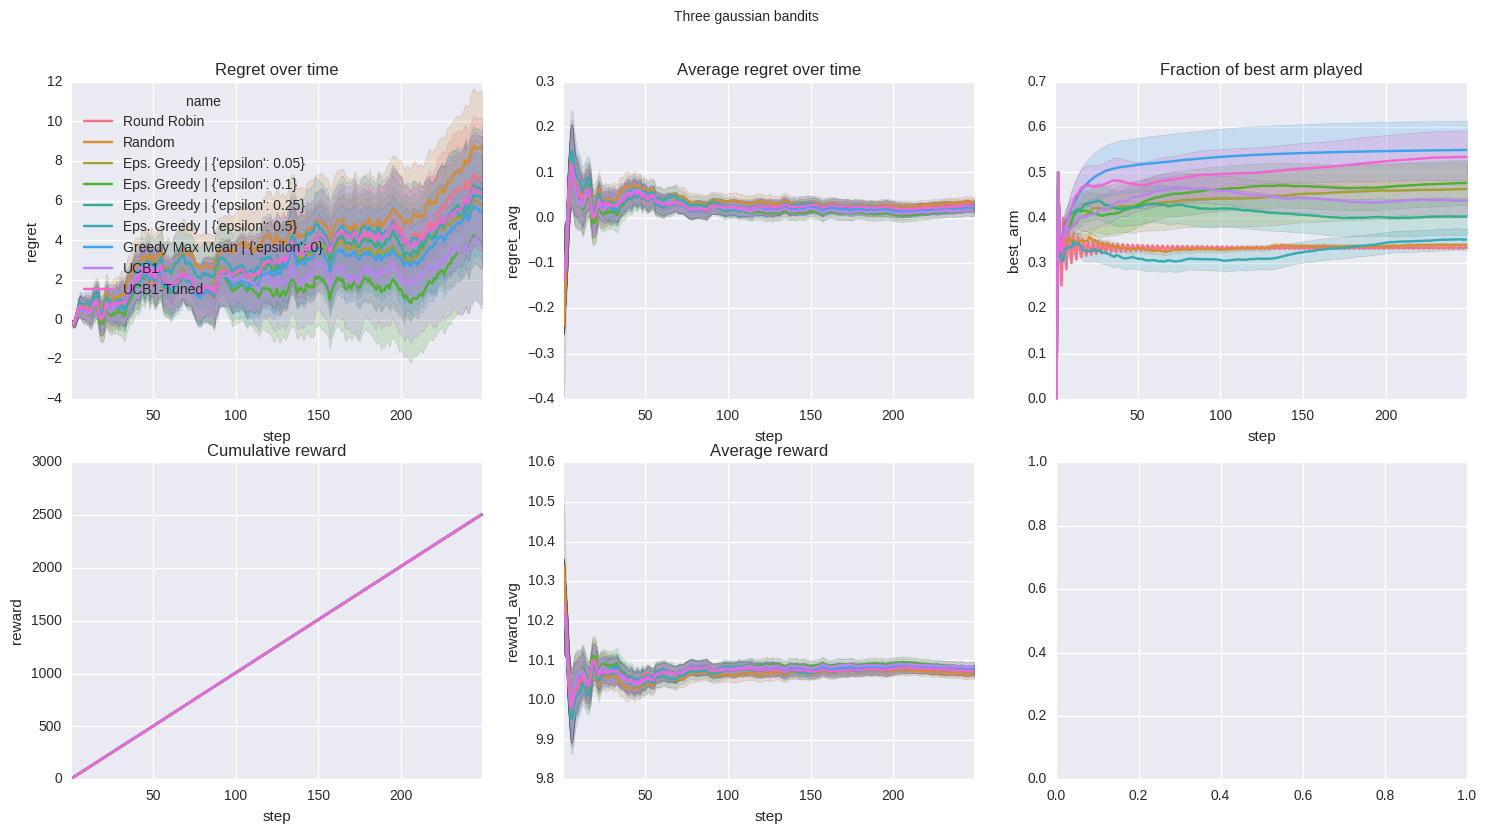

In [7]:
title = "Three gaussian bandits"
config["arms"] = [stats.norm(10, 1), stats.norm(10.1, 1), stats.norm(10.1, 2)]

(fix, ax), plot = pipe(
    run_experiments(**config),
    collect_statistics,
    (plot_statistics, {"title": title, "store": True}),
);